In [1]:
#http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
import numpy as np
import sklearn
from sklearn import datasets, linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,scale

import pandas as pd
%matplotlib inline  

In [2]:
TRAINING_RATE = 1
TESTING_RATE = 1 - TRAINING_RATE
MISSING_RATE = 0.5
QUERY_RATE = 0.2
# np.random.seed(10)

In [3]:
# Generate a dataset and plot it
np.random.seed(0)
#X : array of shape [n_samples, 2]
# e.g. X[0,:]  is [0.74, 0.46]
# X, y = sklearn.datasets.load_files("../dat/wine_quality") # X is 2 x 1 vector for 200 n_samples , y is 0 or 1
data = pd.read_csv("../dat/wine_quality/winequality-white.csv",sep=';')
# plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [4]:
def preprocessing(d):
    #Add normalization code here if necessary
    min_max_scaler = MinMaxScaler()
#     d.ix[:,0:-1] = scale(d.ix[:,0:-1])
    d.ix[:,0:-1] = min_max_scaler.fit_transform(d.ix[:,0:-1])
    #d['quality'] = d['quality'].apply(lambda x:1.0 if x==6 else 0.0)
    d['quality'] = d['quality'].apply(lambda x: int(x) -3)
    d = d.iloc[np.random.permutation(len(d))]
    t = int(len(d) * TRAINING_RATE)
    tn_data = d.iloc[0:t,:]
    tt_data = d.iloc[t:,:]
    
    tn_X = tn_data.ix[:,0:-1]
    tn_Y = tn_data.ix[:,-1]
    tt_X = tt_data.ix[:,0:-1]
    tt_Y = tt_data.ix[:,-1]
    
    
    return tn_X,tn_Y, tt_X, tt_Y

In [5]:
# tn_X,tn_Y,tt_X,tt_Y = preprocessing(data)
X, y,tt_X,tt_Y = preprocessing(data)
X = X.reset_index(drop=True)
X.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.336538,0.235294,0.210843,0.012270,0.121662,0.020906,0.357309,0.102757,0.472727,0.232558,0.435484
1,0.307692,0.225490,0.156627,0.104294,0.178042,0.090592,0.350348,0.159823,0.372727,0.279070,0.290323
2,0.365385,0.058824,0.445783,0.015337,0.091988,0.087108,0.218097,0.086563,0.318182,0.209302,0.451613
3,0.115385,0.205882,0.325301,0.078221,0.077151,0.181185,0.338747,0.051089,0.500000,0.139535,0.790323
4,0.211538,0.196078,0.132530,0.177147,0.115727,0.139373,0.357309,0.165606,0.436364,0.279070,0.338710
5,0.576923,0.833333,0.271084,0.122699,0.127596,0.111498,0.412993,0.236939,0.363636,0.430233,0.354839
6,0.432692,0.117647,0.445783,0.059049,0.103858,0.108014,0.280742,0.101986,0.481818,0.232558,0.677419
7,0.375000,0.225490,0.216867,0.056748,0.050445,0.045296,0.180974,0.085020,0.354545,0.302326,0.645161
8,0.326923,0.098039,0.186747,0.007669,0.106825,0.062718,0.148492,0.103914,0.545455,0.209302,0.451613
9,0.230769,0.166667,0.283133,0.168712,0.115727,0.209059,0.466357,0.186813,0.427273,0.325581,0.241935


In [20]:
# X.ix[0,0]
X = X.as_matrix() # change type "DataFrame" (of Pandas) to numpy array

AttributeError: 'numpy.ndarray' object has no attribute 'as_matrix'

In [21]:
X

array([[ 0.33653846,  0.23529412,  0.21084337, ...,  0.47272727,
         0.23255814,  0.43548387],
       [ 0.30769231,  0.2254902 ,  0.15662651, ...,  0.37272727,
         0.27906977,  0.29032258],
       [ 0.36538462,  0.05882353,  0.44578313, ...,  0.31818182,
         0.20930233,  0.4516129 ],
       ..., 
       [ 0.39423077,  0.24509804,  0.1686747 , ...,  0.39090909,
         0.18604651,  0.12903226],
       [ 0.49038462,  0.17647059,  0.19879518, ...,  0.37272727,
         0.27906977,  0.4516129 ],
       [ 0.39423077,  0.42156863,  0.20481928, ...,  0.33636364,
         0.3372093 ,  0.32258065]])

In [22]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2 # 200 x 2 -> (200 x 3) * (3 x 2)
#     a2 = sigmoid(z2) # 200 x 2
    a2 = z2
    return np.argmax(a2, axis=1)

In [23]:
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = X.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2)
    corect_probs = np.square(a2 - X) * (1/2)
    data_loss = np.sum(corect_probs)
    return data_loss

In [24]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [25]:
num_examples = len(X)
nn_input_dim = 11
nn_output_dim = 11
epsilon = 0.01 #GD update
reg_lambda = 0.01
loss = []
print(X.shape)

(4898, 11)


In [26]:
def sigmoid(x):                                        
    return 1 / (1 + np.exp(-x))

In [27]:
def build_model(nn_hdim, num_passes=5000, print_loss=False):
    np.random.seed() # X is 200 x 2
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim) # 2 x 3
    b1 = np.zeros((1, nn_hdim)) # 1 x 3
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim) # 3 x 2
    b2 = np.zeros((1, nn_output_dim)) # 1 x 2
    
    model = {}
    
    # Gradient Descent in batch
    for i in range(0, num_passes):
        
        # Forward propagation
        z1 = X.dot(W1) + b1 #200 x 3 -> (200 x 2) dot (2 x 3)
        a1 = sigmoid(z1) # 200 x 3
        z2 = a1.dot(W2) + b2 # 200 x 2 -> (200 x 3) * (3 x 2)
        a2 = sigmoid(z2) # 200 x 2
        # Backpropagation
        delta2 = (a2 * (1 - a2)) * (a2 - X) # 200 x 2 -> (200 x 2) * (200 x 2) 
        dW2 = (a1.T).dot(delta2) # 3 x 2 -> (3 x 200) dot (200 x 2)
        db2 = np.sum(delta2, axis=0, keepdims=True) # ? x ?
        delta1 = (a1 * (1 - a1)) * (delta2.dot(W2.T)) # 200 x 3 -> (200 x 3) * ((200 x 2) dot (2 x 3))
        dW1 = (X.T).dot(delta1) # 2 x 3 -> (2 x 200) dot (200 x 3)
        db1 = np.sum(delta1, axis=0) # ? x ?
        
        
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        if print_loss and i % 100 == 0:
            tmp = calculate_loss(model)
            print( "Loss after iteration %i: %f" %(i, tmp) )
            loss.append(tmp)
    return model, a2

In [28]:
# Build a model with a 3-dimensional hidden layer
model, a2 = build_model(3, print_loss=True)
 
# Plot the decision boundary -> no use for autoencoder
# plot_decision_boundary(lambda x: predict(model, x))
# plt.title("Decision Boundary for hidden layer size 3")


Loss after iteration 0: 1488.608424
Loss after iteration 100: 561.107679
Loss after iteration 200: 629.756814
Loss after iteration 300: 505.577291
Loss after iteration 400: 370.514314
Loss after iteration 500: 412.052116
Loss after iteration 600: 275.415778
Loss after iteration 700: 284.455015
Loss after iteration 800: 280.892598
Loss after iteration 900: 256.152403
Loss after iteration 1000: 443.042767
Loss after iteration 1100: 374.977139
Loss after iteration 1200: 457.485685
Loss after iteration 1300: 293.640330
Loss after iteration 1400: 335.788194
Loss after iteration 1500: 357.777487
Loss after iteration 1600: 350.087850
Loss after iteration 1700: 344.050280
Loss after iteration 1800: 334.493185
Loss after iteration 1900: 405.750599
Loss after iteration 2000: 321.446119
Loss after iteration 2100: 377.115800
Loss after iteration 2200: 364.892767
Loss after iteration 2300: 363.907820
Loss after iteration 2400: 355.705305
Loss after iteration 2500: 339.266279
Loss after iteration 26

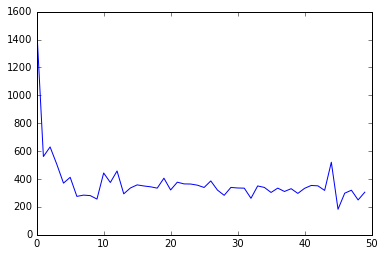

In [29]:
plt.plot(loss)

In [16]:
X

array([[ 0.33653846,  0.23529412,  0.21084337, ...,  0.47272727,
         0.23255814,  0.43548387],
       [ 0.30769231,  0.2254902 ,  0.15662651, ...,  0.37272727,
         0.27906977,  0.29032258],
       [ 0.36538462,  0.05882353,  0.44578313, ...,  0.31818182,
         0.20930233,  0.4516129 ],
       ..., 
       [ 0.39423077,  0.24509804,  0.1686747 , ...,  0.39090909,
         0.18604651,  0.12903226],
       [ 0.49038462,  0.17647059,  0.19879518, ...,  0.37272727,
         0.27906977,  0.4516129 ],
       [ 0.39423077,  0.42156863,  0.20481928, ...,  0.33636364,
         0.3372093 ,  0.32258065]])

In [17]:
a2

array([[  9.99999998e-01,   1.00000000e+00,   1.00000000e+00, ...,
          5.06565739e-10,   0.00000000e+00,   1.68433561e-59],
       [  9.99999997e-01,   1.00000000e+00,   1.00000000e+00, ...,
          9.52184281e-10,   0.00000000e+00,   9.37284048e-58],
       [  9.99999997e-01,   1.00000000e+00,   1.00000000e+00, ...,
          1.00651293e-09,   0.00000000e+00,   1.45818934e-57],
       ..., 
       [  9.99999997e-01,   1.00000000e+00,   1.00000000e+00, ...,
          7.02424119e-10,   0.00000000e+00,   1.93082737e-58],
       [  9.99999999e-01,   1.00000000e+00,   1.00000000e+00, ...,
          2.79511977e-10,   0.00000000e+00,   5.12819811e-61],
       [  9.99999998e-01,   1.00000000e+00,   1.00000000e+00, ...,
          6.37936211e-10,   0.00000000e+00,   9.28200201e-59]])

In [18]:
np.square(a2 - X) * (1/2)

array([[ 0.22009061,  0.29238754,  0.31138409, ...,  0.11173554,
         0.02704164,  0.0948231 ],
       [ 0.23964497,  0.29993272,  0.35563943, ...,  0.06946281,
         0.03893997,  0.0421436 ],
       [ 0.20136834,  0.44290657,  0.15357817, ...,  0.05061983,
         0.02190373,  0.10197711],
       ..., 
       [ 0.18347818,  0.28493849,  0.34555088, ...,  0.07640496,
         0.01730665,  0.00832466],
       [ 0.12985392,  0.33910035,  0.32096458, ...,  0.06946281,
         0.03893997,  0.10197711],
       [ 0.18347818,  0.16729143,  0.31615619, ...,  0.05657025,
         0.05685506,  0.05202914]])

In [19]:
np.square(np.array([1,2])-np.array([3,6]))

array([ 4, 16])